# Decision/Regression Trees
"A [decision tree](https://www.ibm.com/think/topics/decision-trees#:~:text=A%20decision%20tree%20is%20a,internal%20nodes%20and%20leaf%20nodes.) is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes. Decision tree learning employs a divide and conquer strategy by conducting a greedy search to identify the optimal split points within a tree. This process of splitting is then repeated in a top-down, recursive manner until all, or the majority of records have been classified under specific class labels.

Whether or not all data points are classified as homogenous sets is largely dependent on the complexity of the decision tree. Smaller trees are more easily able to attain pure leaf nodes—i.e. data points in a single class. However, as a tree grows in size, it becomes increasingly difficult to maintain this purity, and it usually results in too little data falling within a given subtree. When this occurs, it is known as data fragmentation, and it can often lead to overfitting."

<center><img src="decision_tree_diagram.png"/></center>

## Entropy
Entropy is a measure of impurity or disorder in a dataset, ranging from 0 (completely pure—all samples belong to one class) to 1 (maximally impure—equal distribution across classes). It helps determine how mixed the classes are within a dataset. In decision trees, information gain measures how much entropy is reduced after splitting the data on a particular attribute. The attribute that results in the highest information gain is considered the best for splitting, as it most effectively separates the data into distinct classes.

<center><img src="entropy_formula.png"/></center>

- `S` represents the data set that entropy is calculated 
- `c` represents the classes in set, `S`
- `p(c)` represents the proportion of data points that belong to class `c` to the number of total data points in set, `S`

## Explore Dataset

The [dataset](https://www.kaggle.com/datasets/akshatshaw7/cardiovascular-disease-dataset) we're using classifies people as either having cardiovascular disease or not. Thus, we are using the decision tree algorithm for binary classification by importing [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# Load the data
health_data = pd.read_csv("health_data.csv")  # adjust path if needed

# Drop unnecessary columns
health_data = health_data.drop(columns=["Unnamed: 0", "id"])

health_data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393.0,1,168.0,62.0,110.0,80.0,0,0,0,0,1,0
1,20228.0,0,156.0,85.0,140.0,90.0,2,0,0,0,1,1
2,18857.0,0,165.0,64.0,130.0,70.0,2,0,0,0,0,1
3,17623.0,1,169.0,82.0,150.0,100.0,0,0,0,0,1,1
4,17474.0,0,156.0,56.0,100.0,60.0,0,0,0,0,0,0


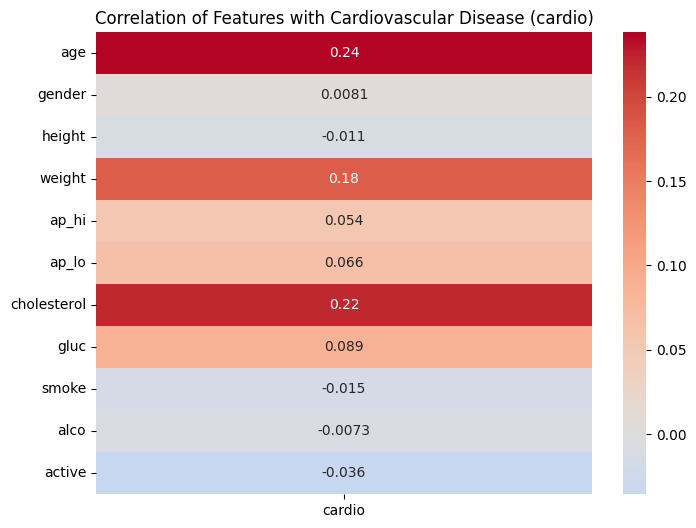

In [20]:
# Calculate correlation of all features with the 'cardio' column
correlations_with_cardio = health_data.corr()['cardio'].drop('cardio')

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlations_with_cardio.to_frame(), 
            annot=True, 
            cmap='coolwarm', 
            center=0, 
            cbar=True)

plt.title('Correlation of Features with Cardiovascular Disease (cardio)')
plt.show()

Among the features, age (0.24) and cholesterol (0.22) show the strongest positive correlations with cardiovascular disease, suggesting that older individuals and those with higher cholesterol levels are more likely to have heart conditions. While the visualizations shows weak correlations between features and the target, regression trees can capture nonlinear relationships that may not be reflected here, so let us move onto implementing the model.

## Implement and Evaluate Model

Total depth of the tree: 53


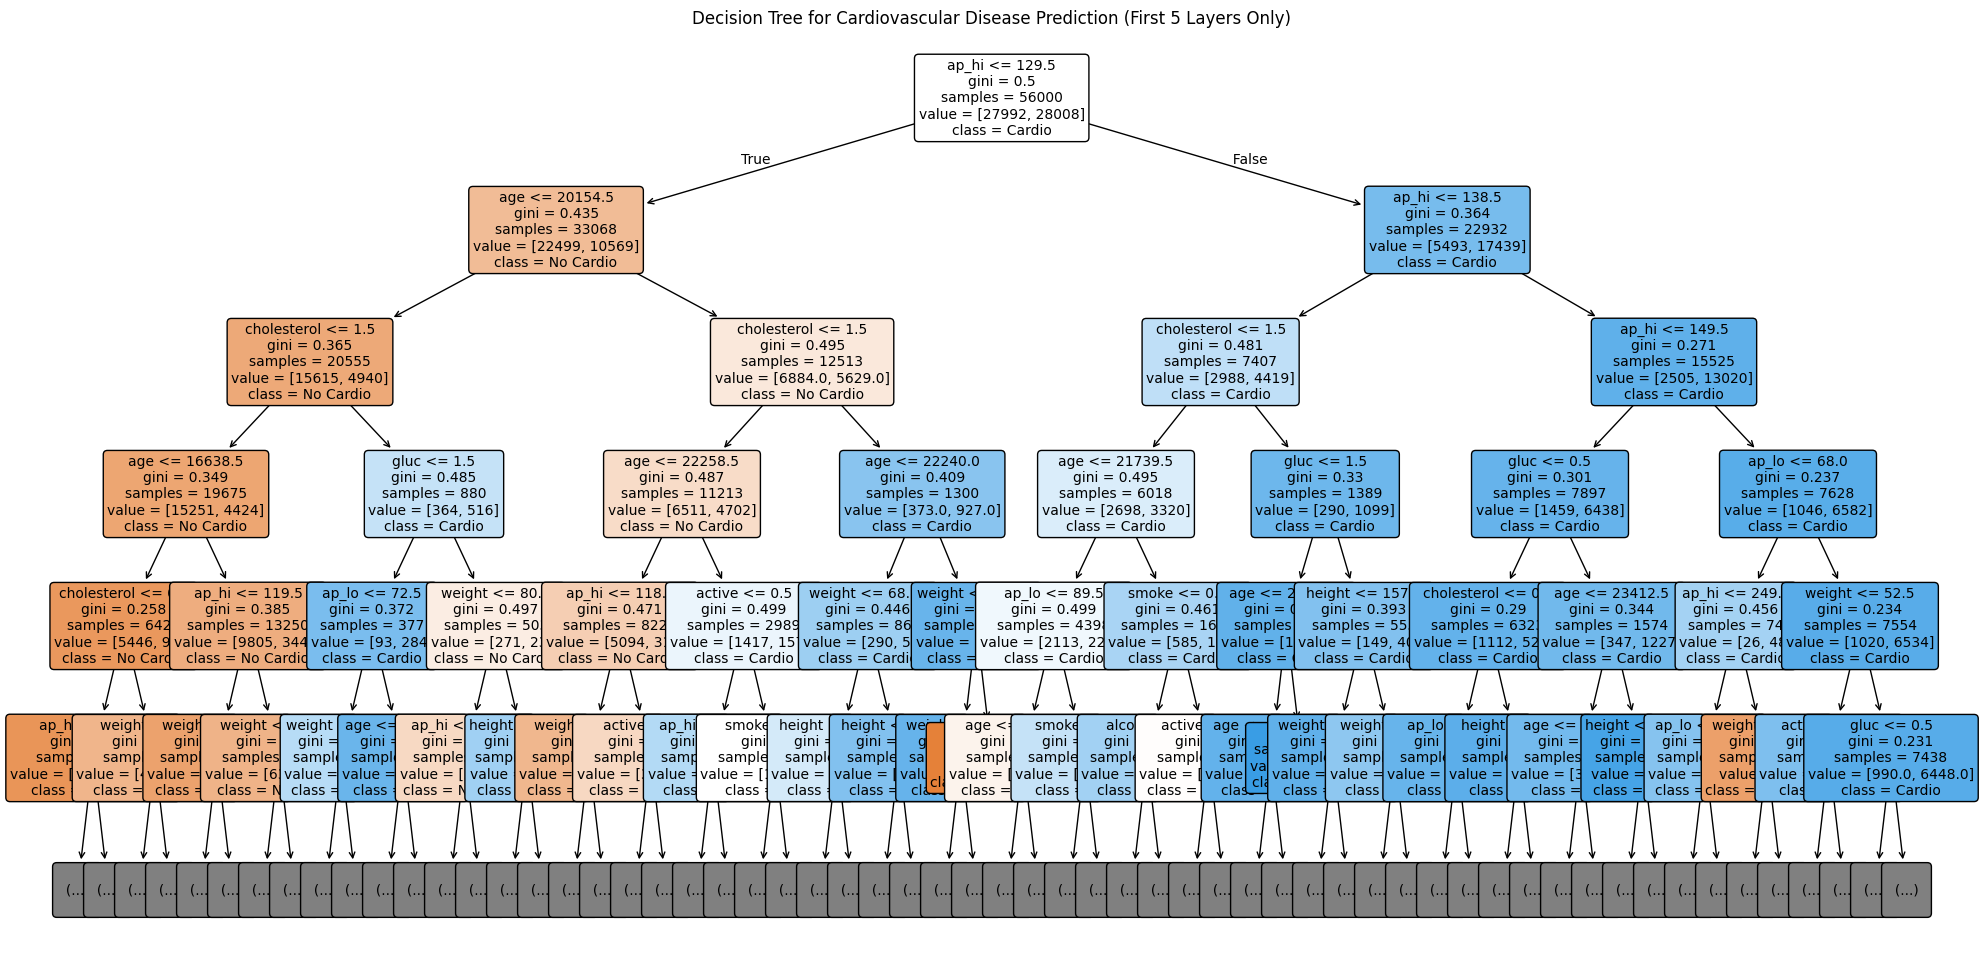

In [4]:
# Prepare features and target
X = health_data.drop(columns=["cardio"])
y = health_data["cardio"]
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Build and train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Print total number of layers (depth)
print(f"Total depth of the tree: {clf.get_depth()}")

# Plot only the first 5 layers
plt.figure(figsize=(24, 12))
plot_tree(clf,
          feature_names=X.columns,
          class_names=["No Cardio", "Cardio"],
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=5)   # <-- Limit visualization to first 5 layers
plt.title("Decision Tree for Cardiovascular Disease Prediction (First 5 Layers Only)")
plt.show()

This decision tree illustrates the first 5 layers used to predict cardiovascular disease, with a total tree depth of 53. Key features repeatedly used across the tree include age, cholesterol, and glucose, which align with the earlier correlation heatmap. The tree uses Gini impurity to evaluate split quality, and each node displays class distribution and sample size. The visual clearly shows that the model captures complex patterns, but the high depth (60) suggests potential overfitting, which may require pruning or regularization to improve generalization.

Accuracy: 0.6389

Classification Report:

              precision    recall  f1-score   support

           0       0.64      0.65      0.64      6984
           1       0.64      0.63      0.64      7016

    accuracy                           0.64     14000
   macro avg       0.64      0.64      0.64     14000
weighted avg       0.64      0.64      0.64     14000



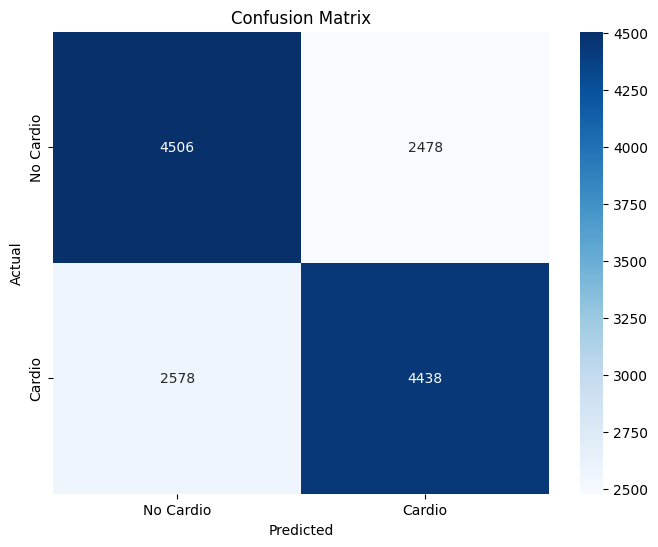

In [29]:
# Predict
y_pred = clf.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(8,6))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                 xticklabels=["No Cardio", "Cardio"],
                 yticklabels=["No Cardio", "Cardio"])

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

The decision tree classifier achieved an overall accuracy of 63.89%, with both precision and recall hovering around 64% for both classes (cardio and no cardio). The confusion matrix indicates that the model correctly predicted 4506 "No Cardio" cases and 4438 "Cardio" cases. However, it misclassified 2478 "No Cardio" and 2578 "Cardio" samples. This suggests the model treats both classes equally but lacks strong discriminative power. The relatively low accuracy highlights the need for feature engineering, model tuning, or trying alternative algorithms.

## Test MaxDepths

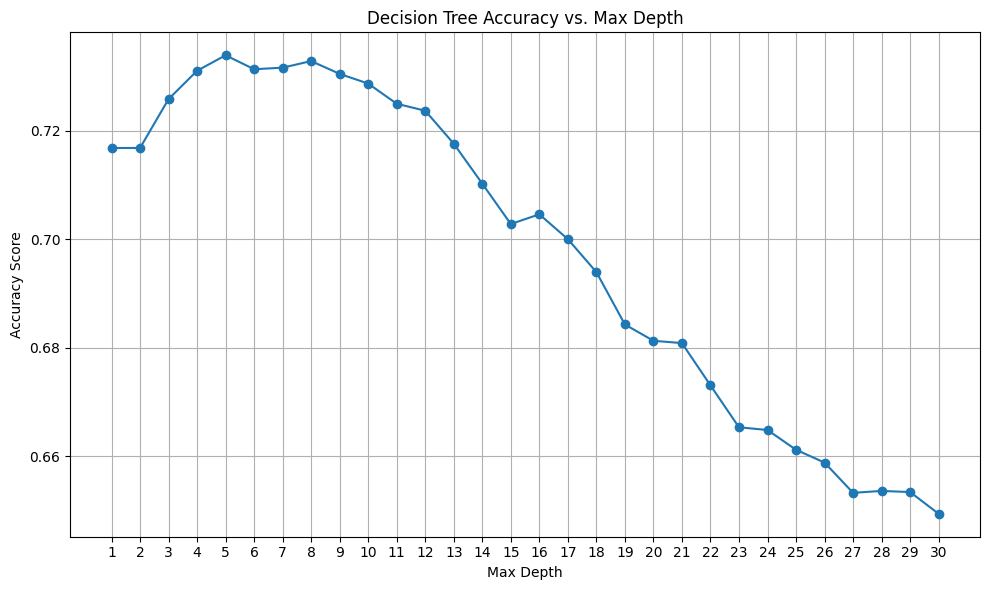

In [9]:
# Define range of max_depth values
depths = list(range(1, 31))
accuracy_scores = []

# Loop through different max_depths
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(depths, accuracy_scores, marker='o')
plt.title('Decision Tree Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.xticks(depths)
plt.tight_layout()
plt.show()

The graph illustrates that as the max depth of the decision tree increases, the accuracy initially improves, peaking around depth 6 to 8. This suggests the model benefits from added complexity up to a point. However, beyond this range, accuracy declines steadily, indicating overfitting—where the model captures noise in the training data rather than meaningful patterns. This emphasizes the importance of selecting an optimal tree depth to balance performance and generalization.